# Paper Results Notebook
This notebook is intended to help users replicate the results included in the paper. It also demonstrates how to set up a variaty of different types of problems. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import shutil
from tqdm.autonotebook import tqdm, trange
import itertools
import pandas as pd
import sklearn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score


import importlib
import evaluation
import load_data
import Padgan_variants
import VAEs
import utils

importlib.reload(evaluation)
importlib.reload(load_data)
importlib.reload(VAEs)
importlib.reload(Padgan_variants)
importlib.reload(utils)

C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\2801743236.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


<module 'utils' from 'C:\\Users\\Lyle\\Documents\\DeCoDE\\DGM-Evaluation-Metrics\\utils.py'>

**General Settings**

In [6]:
numgen = 1000 #Number of samples to generate
numinst = 1 #Number of instantiations to test
numanim = 1 #Number of animation frames
scaling = True #Scale or not
scorebars = True #Print progress bars for scoring functions

np.random.seed(0)

**Similarity**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\533801500.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\533801500.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113403/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20230727-113403/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113403/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20230727-113403/Models/VAE_Problem_0_Instance_0_decoder\assets
[array([5000]), array([1000])]
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|=====================================================| 5/5 [00:00<00:00,  6.45it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|=====================================================| 5/5 [00:00<00:00,  5.59it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating ML Efficacy


Problem 1 Scores:,GAN,VAE
Nearest Dataset Sample,0.012647,0.050072
Nearest Generated Sample,0.074044,0.082158
Rediscovery,0.089428,0.051807
F1,0.604578,0.531832
F10,0.959960,0.901234
F0.1,0.867849,0.856570
AUC-PR,0.635131,0.571266
MMD,0.004378,0.030579
ML Efficacy,0.840662,0.761007


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

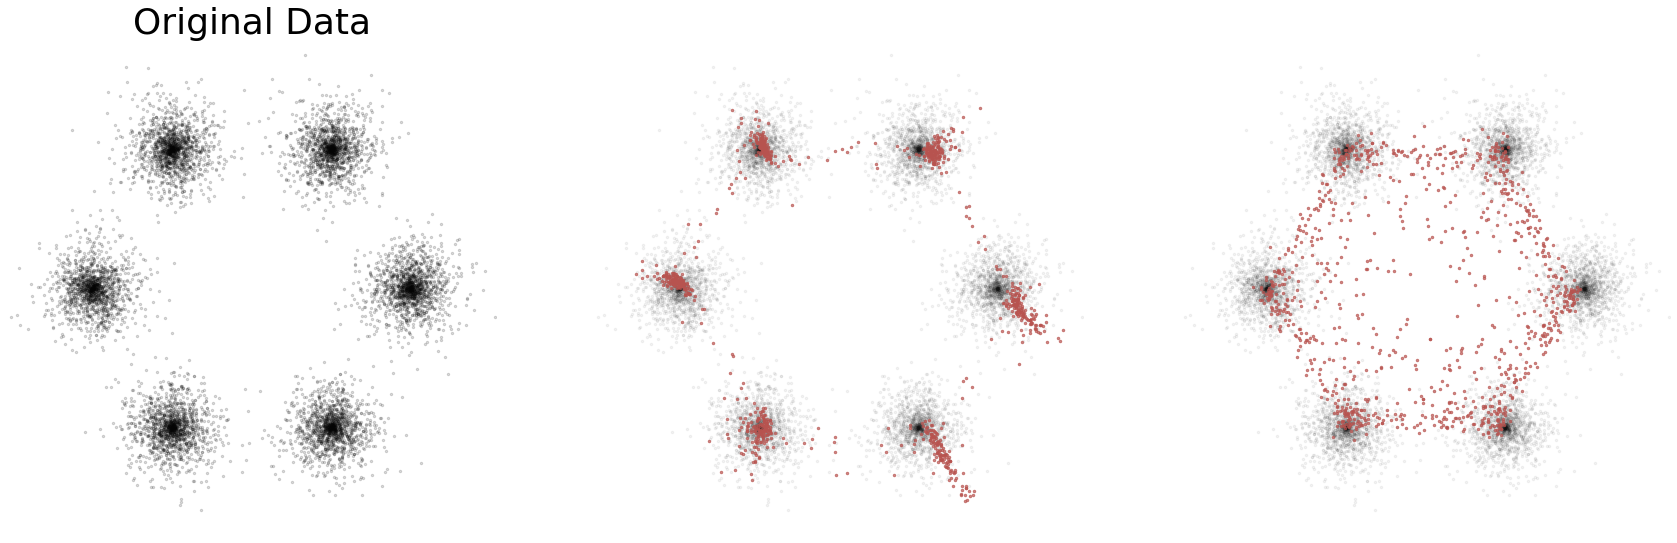

In [27]:
functions=[]

DM_val = load_data.all_val_wrapper()

#In this case, we include objectives specifically for ML efficacy
DM_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 

pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes

rangearr = np.array([[-2,2], [-2,2]])
functions.append([sampling_func, DM_val, DM_objs, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, False])

metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]

#Rediscovery needs special handling in the utils file. 
#We pass in a special flag: "Rediscovery" to trigger this handling. See utils file for more info
metrics["Rediscovery"] = ["minimize", "Rediscovery", evaluation.data_gen_distance_wrapper("x", "min")]
holdout = 0.05 #If using rediscovery, we need to hold out a portion of the data during training

metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper('x')]
metrics["ML Efficacy"] = ["maximize", evaluation.ML_efficacy_wrapper(KNeighborsRegressor(n_neighbors=5), r2_score)]

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

#fit and generate
timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout)
# or load pre-generated data, e.g.: timestr = "20230212-150132"
utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "red")

**Diversity**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\152287435.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\152287435.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113235/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20230727-113235/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113235/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20230727-113235/Models/VAE_Problem_0_Instance_0_decoder\assets
[array([5000]), array([1000])]
Calculating Gen-Gen Distance
Calculating Convex Hull
Calculating Data-Gen Distance
Calculating Distance to Centroid
Calculating Gen-Gen Distance
Calculating Convex Hull
Calculating Data-Gen Distance
Calculating Distance to Centroid


Problem 1 Scores:,GAN,VAE
Inter-Generated Sample,0.013014,0.032105
Convex Hull,6.339794,5.470190
DPP Diversity,14.779593,14.385620
Nearest Generated Sample,0.128431,0.095359
Distance to Centroid,1.301045,1.107400


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

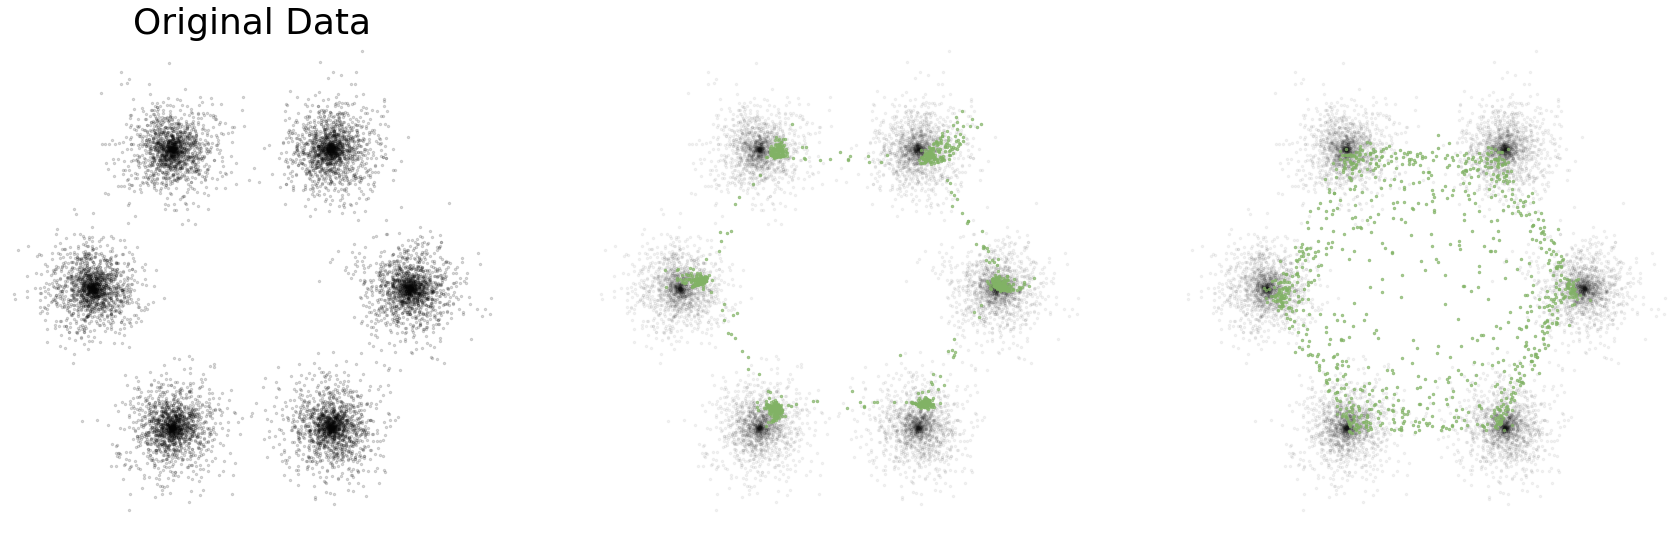

In [26]:
functions=[]

DM_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes

rangearr = np.array([[-2,2], [-2,2]])
functions.append([sampling_func, DM_val, None, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, False])


metrics=pd.Series()
metrics["Inter-Generated Sample"] = ["maximize", evaluation.gen_gen_distance_wrapper("x", "min")]
metrics["Convex Hull"] = ["maximize", evaluation.convex_hull_wrapper("x")]
metrics["DPP Diversity"] = ["minimize", evaluation.DPP_diversity_wrapper("x")]
metrics["Nearest Generated Sample"] = ["maximize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["Distance to Centroid"] = ["maximize", evaluation.distance_to_centroid_wrapper("x")]


validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "green")

**Constraint Adherence**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\2529621900.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\2529621900.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113019/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20230727-113019/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113019/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20230727-113019/Models/VAE_Problem_0_Instance_0_decoder\assets
[array([5000]), array([1000])]
Calculating predicted_constraint_satisfaction
Calculating Gen-Neg Distance
Calculating predicted_constraint_satisfaction
Calculating Gen-Neg Distance


Problem 1 Scores:,GAN,VAE
Predicted Constraint Satisfaction,0.925600,0.548600
Validity,0.918000,0.528000
Nearest Invalid Sample,0.177064,0.125567


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

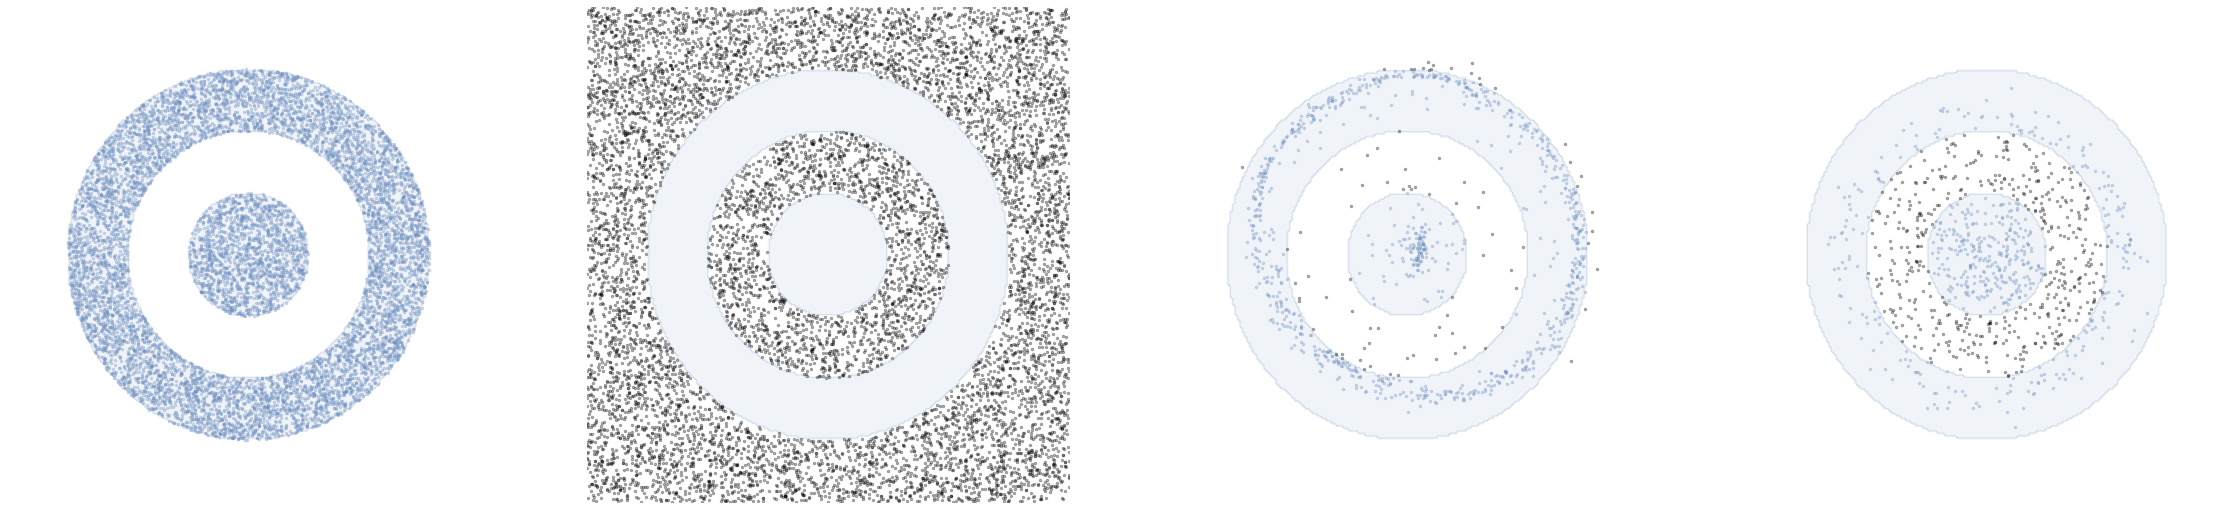

In [25]:
functions=[]

sampling_func_2 = load_data.sample_uniform_wrapper(10000, 10000) #Uniform Sampling with Number of positive samples & Negative Samples
validity_func_2 = load_data.concentric_circles_val_wrapper(2, 0.5)
rangearr_2 = np.array([[-1,1], [-1,1]])
functions.append([sampling_func_2, validity_func_2, None, rangearr_2, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, False])


metrics=pd.Series()
metrics["Predicted Constraint Satisfaction"] = ["maximize", evaluation.predicted_constraint_satisfaction_wrapper(KNeighborsClassifier(n_neighbors=5))]
metrics["Validity"] = ["maximize", "Validity"] #Validity is handled specially in utils
metrics["Nearest Invalid Sample"] = ["maximize", evaluation.gen_neg_distance_wrapper("min")]


validity_status = 1 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "blue")

**Performance and Target Achievement**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\241132271.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\241132271.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

[128, 2]
[128, 6]
INFO:tensorflow:Assets written to: Results/20230726-231955/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20230726-231955/Models/GAN_Problem_0_Instance_0_discriminator\assets
No regressor provided! Fitting DNN Regressor using provided Parameters...
Epoch 1/100
250/250 [==============================] - 2s 6ms/step - loss: 0.0307 - MSE: 0.0307 - val_loss: 0.0095 - val_MSE: 0.0095
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.0137 - MSE: 0.0137 - val_loss: 0.0078 - val_MSE: 0.0078
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0123 - MSE: 0.0123 - val_loss: 0.0076 - val_MSE: 0.0076
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.0115 - MSE: 0.0115 - val_loss: 0.0078 - val_MSE: 0.0078
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0109 - MSE: 0.0109 - val_loss: 0.0075 - val_MSE: 0.0075
Epoch 6/100
250/250 [==

Epoch 60/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0069 - MSE: 0.0069 - val_loss: 0.0062 - val_MSE: 0.0062
Epoch 61/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0069 - MSE: 0.0069 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 62/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0070 - MSE: 0.0070 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 63/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0068 - MSE: 0.0068 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 64/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0068 - MSE: 0.0068 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 65/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0068 - MSE: 0.0068 - val_loss: 0.0058 - val_MSE: 0.0058
Epoch 66/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0068 - MSE: 0.0068 - val_loss: 0.0058 - val_MSE: 0.0058
Epoch 67/100
250/250 [==============================] - 2s 7ms

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

[128, 2]
[128, 6]
INFO:tensorflow:Assets written to: Results/20230726-231955/Models/MO-PaDGAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20230726-231955/Models/MO-PaDGAN_Problem_0_Instance_0_discriminator\assets
[array([5000]), array([5000])]
Calculating DTAI
Calculating Hypervolume
Calculating Generational Distance
Calculating Weighted Target Success Rate
Calculating DTAI
Calculating Hypervolume
Calculating Generational Distance
Calculating Weighted Target Success Rate


Problem 1 Scores:,GAN,MO-PaDGAN
DTAI,0.320606,0.352205
Hypervolume,0.461864,0.573886
Generational Distance,0.216263,0.229796
Weighted Target Success Rate,0.157000,0.225500
Signed Distance to Target,-0.284095,-0.251797


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

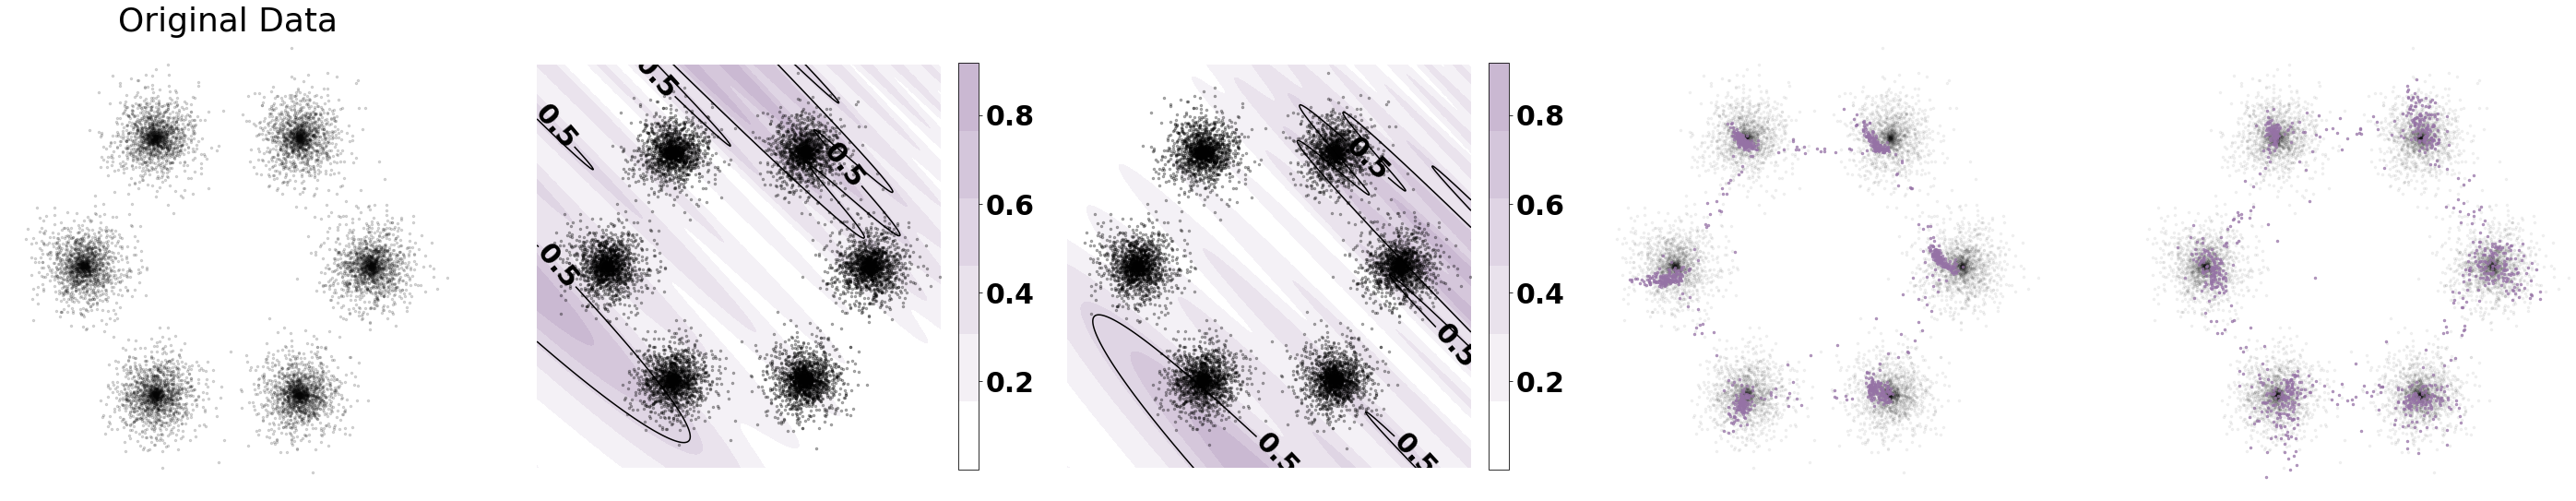

In [13]:
functions=[]

Perf_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes
Perf_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 
rangearr = np.array([[-2,2], [-2,2]])
functions.append([sampling_func, Perf_val, Perf_objs, rangearr, None, None])

reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)

# Regressor/Classifier params: [dropout, layers, layersize, batchnorm, activation, patience, lr, batchsize, epochs]
reg_clf_params = [0.1, 2, 100, True, "Leaky ReLU", 30, 1e-4, 32, 100]
config_params = [False, False, False, "auto", "auto", False]
train_params = [128, 1e-3, 1e-3, 5, 2, 4, 5000]
DTAI_params= ["auto", "auto", "auto"]
methods["MO-PaDGAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)

metrics=pd.Series()
target = np.array([0.5, 0.5])
a_ = np.array([1, 1])
p_ = np.array([1, 1])
direction = "maximize" #Whether to maximize or minimize the objective function. Not to be confused with whether evaluation metrics are best maximized or minimized!
metrics["DTAI"] = ["maximize", evaluation.DTAI_wrapper(direction, target, a_, p_)]
metrics["Hypervolume"] = ["maximize", evaluation.Hypervolume_wrapper()]
metrics["Generational Distance"] = ["minimize", evaluation.Generational_distance_wrapper(pareto)]
metrics["Weighted Target Success Rate"] = ["maximize", evaluation.weighted_target_success_rate_wrapper(direction, target, p_)]
metrics["Signed Distance to Target"] = ["maximize", evaluation.signed_distance_to_boundary_wrapper(direction, target, a_)]


validity_status = 0 #whether we are considering constraints
obj_status = 1 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution
plotobjs = target

timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "purple", plotobjs)

**Conditioning**

C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\71391423.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()
C:\Users\Lyle\AppData\Local\Temp\ipykernel_29844\71391423.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113616/Models/cGAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20230727-113616/Models/cGAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20230727-113616/Models/cVAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20230727-113616/Models/cVAE_Problem_0_Instance_0_decoder\assets
[array([5000]), array([1000])]
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall::   0%|                                                             | 0/5 [00:00<?, ?it/s]C:\Users\Lyle\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
Calculating Precision/Recall::  20%|==========                                           | 1/5 [00:00<00:00,  7.57it/s]C:\Users\Lyle\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
Calculating Precision/Recall::  40%|=====================                                | 2/5 [00:00<00:00,  7.61it/s]C:\Users\Lyle\anaconda3\envs\tf\lib\site-packages\skl

Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating predicted_constraint_satisfaction
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall::   0%|                                                             | 0/5 [00:00<?, ?it/s]C:\Users\Lyle\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
Calculating Precision/Recall::  20%|==========                                           | 1/5 [00:00<00:00,  6.62it/s]C:\Users\Lyle\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
Calculating Precision/Recall::  40%|=====================                                | 2/5 [00:00<00:00,  6.89it/s]C:\Users\Lyle\anaconda3\envs\tf\lib\site-packages\skl

Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating predicted_constraint_satisfaction


Problem 1 Scores:,cGAN,cVAE
Nearest Dataset Sample,0.050273,0.175184
Nearest Generated Sample,0.021095,0.106209
F1,0.756076,0.392740
F10,0.896407,0.703652
F0.1,0.983848,0.763504
AUC-PR,0.821798,0.345476
MMD,0.016199,0.108656
Conditioning Reconstruction,0.009809,0.012948
Conditioning Adherence,0.008646,0.017825


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

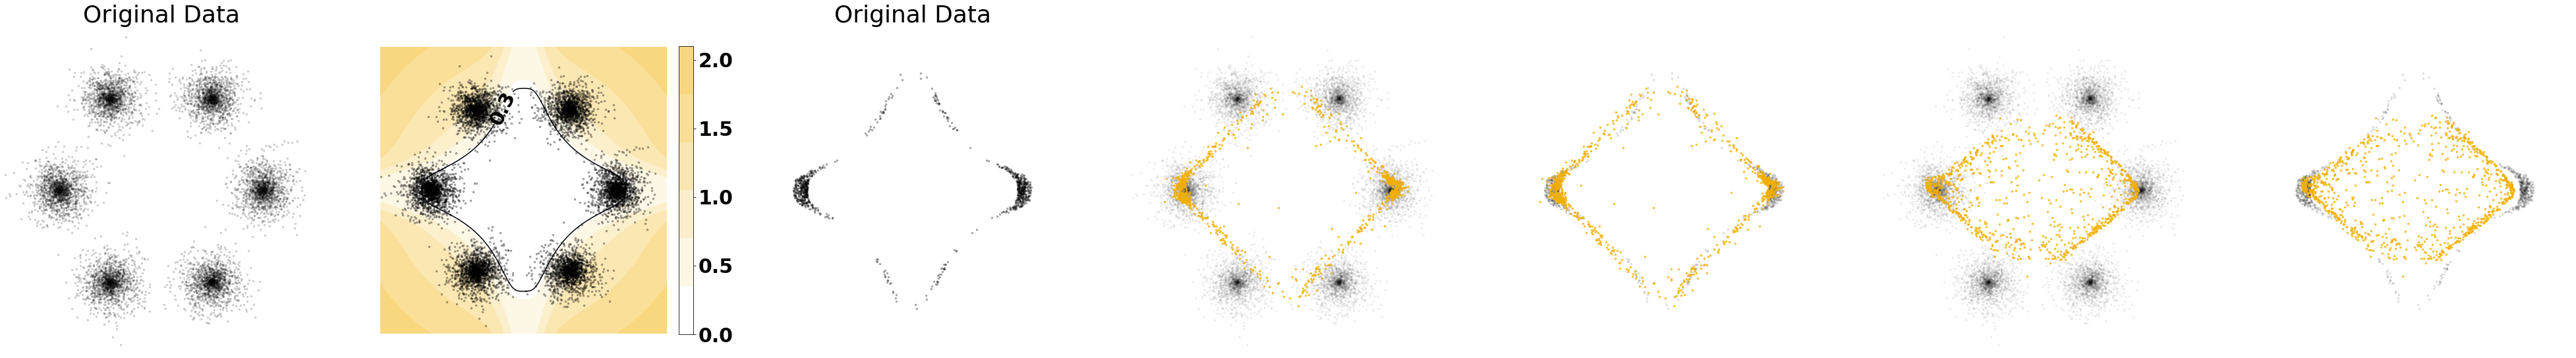

In [28]:
#Note: only single variable continuous conditioning is currently supported

functions=[]

DM_val = load_data.all_val_wrapper()
pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #6 Modes
rangearr = np.array([[-2,2], [-2,2]])
cond_func = load_data.exp_obj_wrapper(1,1)
cond=0.3
functions.append([sampling_func, DM_val, None, rangearr, cond_func, cond])


reg_clf_params = None
config_params_cond = [False, False, False, None, None, True]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["cGAN"] = Padgan_variants.padgan_wrapper(config_params_cond, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["cVAE"] = VAEs.VAE_wrapper([1000, 128, 1e-3, 4, .05, True])

metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper('x')]

#Conditioning Reconstruction and Adherence needs special handling in the utils file. We pass in their respective flags as follows:
metrics["Conditioning Reconstruction"] = ["maximize", "Conditioning Reconstruction", evaluation.predicted_conditioning_wrapper(KNeighborsRegressor(n_neighbors=5), cond)]
metrics["Conditioning Adherence"] = ["maximize", "Conditioning Adherence"]

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 1 #whether we are considering conditioning
cond_dist=True #Whether conditional metrics are compared against conditional or marginal distribution


#Generate a new set of results
timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout=0)

#OR Load a set of results from a timestring:
# timestr= "20230204-161902"

plotobjs = [cond]

utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars)
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "orange", plotobjs)